# Overview

The goal of this assignment was to implement depth first search, breadth first search, and A* search. Below, I implemented each algorithm in its own section. Some of the code is redunant between sections, but this is so that each section can be ran on its own without having to search for the proper code block in a different place. Additionally, I included code for visualizing the search space using the networkx library.

Each section of code follows the same basic structure. First the files are imported from my Google Drive, then the graph is set up using the provided files, and finally the search is performed. The test case can be altered by commenting and uncommenting the appropriate lines in the file import code, and for A*, the heuristic can be changed by running the desired heuristic function before executing the search algorithm.

I chose to evaluate each algorithm based on the number of nodes it visits before finding a valid solution. The table below shows the results I obtained for each search algorithm including the two different heuristics used for the A* algorithm.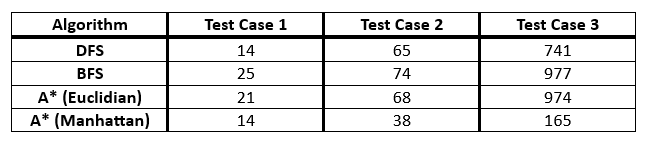

As you can see, DFS performed reasonably well as the search space grew. Breadth first search performed poorly due to the depth of the goal node. A* search with the euclidian distance heuristic performed very similarly to BFS due to the weakness of the heuristic function (discussed in more detail below), and A* search with the Manhattan heuristic performed the best overall as its heuristic function was most useful in ruling out bad paths.

# Depth First Search



In [61]:
#Give access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to the file in Google Drive
txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_EdgeList.txt"
csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_NodeID.csv"
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_NodeID.csv"
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_NodeID.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I chose to use an adjacency dictionary to represent the search space for each algorithm. For DFS and BFS this dictionary did not include any information about the x and y coordinates, but I later created my own Node class to contain that information.

In [62]:
#Initialize an empty adjacency dictionary
graph = {}

#Read data from text file
with open(txt_file_path, 'r') as file:
    for line in file:
        info = line.strip().split(',')
        node1, node2, weight = info[0], info[1], float(info[2])

        #Add edges to the adjacency dict
        if node1 in graph:
            graph[node1].append((node2, weight))
        else:
            graph[node1] = [(node2, weight)]

        #Undirected so add the reverse edge
        if node2 in graph:
            graph[node2].append((node1, weight))
        else:
            graph[node2] = [(node1, weight)]

In [63]:
#Initialize variables for the start and goal nodes
start_node = None
goal_node = None

#Read data from the CSV file
with open(csv_file_path, mode='r') as file:
    for line in file:
        parts = line.strip().split(',')  #Split the line by commas
        node = parts[0]

        #Extract the start node (first row) and continuously update the goal node
        if start_node is None:
            start_node = node
        goal_node = node

print("Start Node:", start_node)
print("Goal Node:", goal_node)

Start Node: N_0
Goal Node: N_24


To implement DFS, I used a python list to act as a stack. I began by putting the start node on the stack. Then the code goes into a loop where it adds the current node's neighbors to the stack if they have not yet been visited. Using a stack ensures that the last neighbor added will be the next node visited which is the essence of DFS. Eventually, the program will find the goal node and return the output. I could have combined the output list and visited_nodes list, but at this point, everything works, so I'll abide by the golden rule of engineering: if it isn't broken, don't fix it.

In [64]:
visited_nodes = [] #To avoid infinite loops
stack = [] #DFS uses a stack
output = [] #To print at the end

stack.append(start_node)
while(len(stack) > 0):

  current_node = stack.pop()
  if current_node == goal_node: #if we found the goal node
    output.append(current_node)
    print(output)
    break

  else: #if we didn't find the goal node
    neighbors = graph[current_node]
    for neighbor in neighbors:
      if neighbor[0] not in visited_nodes:
        stack.append(neighbor[0]) #add any neighbors not yet visited
    visited_nodes.append(current_node) #to avoid revisiting
    output.append(current_node)

#print("Total nodes visited: " + str(len(output)))

['N_0', 'N_1', 'N_2', 'N_3', 'N_6', 'N_7', 'N_12', 'N_17', 'N_22', 'N_23', 'N_13', 'N_18', 'N_19', 'N_24']


# Breadth First Search



In [84]:
#Give access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to the file in Google Drive
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_NodeID.csv"
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_NodeID.csv"
txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_EdgeList.txt"
csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_NodeID.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#Initialize an empty adjacency dictionary
graph = {}

#Read data from text file
with open(txt_file_path, 'r') as file:
    for line in file:
        info = line.strip().split(',')
        node1, node2, weight = info[0], info[1], float(info[2])

        #Add edges to the adjacency dict
        if node1 in graph:
            graph[node1].append((node2, weight))
        else:
            graph[node1] = [(node2, weight)]

        #Undirected so add the reverse edge
        if node2 in graph:
            graph[node2].append((node1, weight))
        else:
            graph[node2] = [(node1, weight)]

In [86]:
#Initialize variables for the start and goal nodes
start_node = None
goal_node = None

#Read data from the CSV file
with open(csv_file_path, mode='r') as file:
    for line in file:
        parts = line.strip().split(',')  #Split the line by commas
        node = parts[0]

        #Extract the start node (first row) and continuously update the goal node
        if start_node is None:
            start_node = node
        goal_node = node


print("Start Node:", start_node)
print("Goal Node:", goal_node)

Start Node: N_0
Goal Node: N_999


To implement BFS, I used a python list to act as a queue. I began by putting the start node in the queue. Then the code goes into a loop where it adds the current node's neighbors to the queue if they have not yet been visited or are not currently waiting in the queue. Using a queue ensures that the first neighbor added will be the next node visited which is the essence of BFS. Eventually, the program will find the goal node and return the output. I could have combined the output list and visited_nodes list, but at this point, everything works, so I'll abide by the golden rule of engineering: if it isn't broken, don't fix it.

In [88]:
visited_nodes = [] #to avoid infinite loops
queue = [] #DFS uses a stack
output = [] #to print at the end

queue.append(start_node)
while(len(queue) > 0):

  current_node = queue.pop(0)
  if current_node == goal_node: #if we found the goal node
    output.append(current_node)
    print(output)
    break

  else: #if we didn't find the goal node
    neighbors = graph[current_node]
    for neighbor in neighbors:
      if neighbor[0] not in visited_nodes and neighbor[0] not in queue:
        queue.append(neighbor[0]) #add any neighbors not yet visited
    visited_nodes.append(current_node) #to avoid revisiting
    output.append(current_node)

#print("Total nodes visited: " + str(len(output)))

['N_0', 'N_1', 'N_100', 'N_2', 'N_200', 'N_102', 'N_300', 'N_201', 'N_400', 'N_301', 'N_101', 'N_202', 'N_500', 'N_401', 'N_302', 'N_501', 'N_600', 'N_402', 'N_502', 'N_602', 'N_601', 'N_603', 'N_503', 'N_703', 'N_604', 'N_504', 'N_403', 'N_803', 'N_704', 'N_605', 'N_404', 'N_303', 'N_802', 'N_903', 'N_804', 'N_705', 'N_304', 'N_203', 'N_902', 'N_801', 'N_904', 'N_805', 'N_706', 'N_204', 'N_901', 'N_800', 'N_905', 'N_806', 'N_205', 'N_900', 'N_700', 'N_906', 'N_305', 'N_206', 'N_701', 'N_306', 'N_207', 'N_702', 'N_406', 'N_107', 'N_307', 'N_405', 'N_506', 'N_407', 'N_108', 'N_106', 'N_7', 'N_505', 'N_606', 'N_208', 'N_8', 'N_109', 'N_6', 'N_105', 'N_607', 'N_209', 'N_308', 'N_9', 'N_110', 'N_5', 'N_707', 'N_608', 'N_309', 'N_10', 'N_111', 'N_210', 'N_4', 'N_807', 'N_708', 'N_609', 'N_310', 'N_11', 'N_112', 'N_3', 'N_808', 'N_709', 'N_610', 'N_311', 'N_410', 'N_12', 'N_212', 'N_103', 'N_908', 'N_809', 'N_611', 'N_211', 'N_312', 'N_409', 'N_510', 'N_213', 'N_104', 'N_909', 'N_907', 'N_81

# A* Search

In [72]:
#Give access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to the file in Google Drive
txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_EdgeList.txt"
csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_NodeID.csv"
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_NodeID.csv"
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_NodeID.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For A* search I chose to change up my implementation by creating a class called Node to store all the relevant information for each node such as its x and y coordinates and its values for the g, h, and f functions. I hoped that this would simplify the process of creating the algorithm which it did, but it also led to a slight problem where I would sometimes reference the Node object and sometimes reference the name of the node itself ('N_0'). Ultimately, this didn't slow me down much, but it can make the code a little ugly to read.

In [73]:
#This class is used to hopefully make accessing the proper f,g,h,x, and y less confusing
class Node:
    def __init__(self, name):
        self.name = name
        self.x = None
        self.y = None
        self.parent = None
        self.h = None
        self.g = None
        self.f = None
        self.neighbors = []

    def set_x(self, x):
        self.x = x
    def set_y(self, y):
        self.y = y
    def get_x(self):
        return self.x
    def get_y(self):
        return self.y

    def set_parent(self, parent):
        self.parent = parent
    def get_parent(self):
        return self.parent


    def set_h(self, h):
        self.h = h
        try:
            self.f = self.g + self.h
        except TypeError as e:
            #Handle the exception
            f = None
    def set_g(self, g):
        self.g = g
        try:
            self.f = self.g + self.h
        except TypeError as e:
            #Handle the exception
            f = None

    def get_h(self):
        return self.h
    def get_g(self):
        return self.g
    def get_f(self):
        return self.f

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)
    def get_neighbors(self):
        return self.neighbors
    def get_neighbor_weight(self, neighbor):
        for x in self.neighbors:
            if x[0] == neighbor:
                return x[1]
        raise ValueError(f"{neighbor} not found in the list")
    def get_name(self):
        return self.name


Rather than a dictionary full of node names and weights as before, this dictionary now contains node objects which contain all the information about the node.

In [74]:
#Create a dictionary to store Node objects with their names as keys
graph = {}

#Read the text file
with open(txt_file_path, 'r') as file:
    for line in file:
        #Split the line to extract node names and weight
        node1_name, node2_name, weight = line.strip().split(',')

        #Create Node objects
        if node1_name not in graph:
            graph[node1_name] = Node(node1_name)
        if node2_name not in graph:
            graph[node2_name] = Node(node2_name)

        #Set attributes of the Node objects
        node1 = graph[node1_name]
        node2 = graph[node2_name]

        #Add neighbors
        node1.add_neighbor((node2.get_name(), weight))
        node2.add_neighbor((node1.get_name(), weight))

In [76]:
#Initialize variables for the start and goal nodes
start_node = None
goal_node = None

#Read data from the CSV file
with open(csv_file_path, mode='r') as file:
    for line in file:
        node, x, y = line.strip().split(',')
        graph[node].set_x(int(x))
        graph[node].set_y(int(y))

        #Extract the start node (first row) and continuously update the goal node
        if start_node is None:
            start_node = node
        goal_node = node

    start_node = graph[start_node]
    goal_node = graph[goal_node]

Euclidian Distance Heuristic Function

The below function assumes that the goal node is located in the farthest corner of the search space as in the test cases. Using this information, we can calculate the euclidian distance from the current node to the goal node, and divide it by the maximum distance to ensure that h(n) returns a value of less than 1 and is therefore admissable.

This heuristic doesn't take into account that there are no diagonal paths in the search space as the manhattan heuristic does and therefore can't return a high enough h(n) value to greatly speed up the search. Essentially, because f(n)=g(n)+h(n), the g(n) term takes over due to the small value of h(n), so almost all nodes are visited.

This heuristic is admissable meaning that the most optimal path will be found, but the heuristic isn't good enough to make the search much more efficient. It ends up being very similar to BFS with regard to the number of nodes visited due to the limited power of the heuristic.  

In [77]:
import math #I'm assuming this is allowed. I want to use sqrt function

max_x = float('-inf')  #Start with negative infinity as the initial maximum
max_y = float('-inf')
#Iterate through the nodes and update max_x and max_y if a higher coordinate is found
for node in graph:
    x = graph[node].get_x()
    y = graph[node].get_y()
    if x > max_x:
        max_x = x
    if y > max_y:
        max_y = y

#This heuristic function returns the distance from the input node to the goal node/the max distance (to ensure h(n) < 1)
def heuristic(node):
    distance = math.sqrt((node.get_x() - max_x)**2 + (node.get_y() - max_y)**2)
    max_distance = math.sqrt(max_x**2 + max_y**2)
    return (distance/max_distance)

#print(heuristic(graph["N_100"]))

Manhattan Distance Heuristic Function

The below heuristic function takes advantage of the fact that the nodes are laid out like city blocks with no diagonals and only edges to adjacent nodes. Because of this, when given a node, we can calculate the least number of steps it is from the goal node. This allows us to return a value for h(n) which is larger than 1 but still admissable.

Ultimately, this is a much better heuristic function that the euclidian heuristic function, and it greatly reduces the number of visited nodes when compared to uninformed searches as shown in the table.

In [53]:
#Find out where the goal_node is at
goal_x = goal_node.get_x()
goal_y = goal_node.get_y()

#This heuristic uses the fact that there are no diagonal paths to give a higher estimate for h(n)
def heuristic(node):
    x_distance = abs(goal_x - node.get_x())
    y_distance = abs(goal_y - node.get_y())
    return x_distance + y_distance

The following code implements the A* search. It begins by checking if we happen to start searching at the goal node. Then, it adds the start node to the frontier and sets the start node's f value to zero. It then enters into a while loop where it selects the node with the lowest f value from the frontier as the current node. Then it iterates through the neighbors of the current node updating their g, h, and f values, adding them to the frontier, and checking if they are the goal node. It continues this process of expanding the frontier via the frontier node with the lowest f value until the goal node is found.

Additionally, I added a for loop at the end to print out the optimal path from the start node to the goal node using the get_parent() method in my Node class.

In [78]:
visited_nodes = [] #to avoid infinite loops
frontier = [] #nodes that could be visited next
output = [] #to print at the end
found = False

#Check if the start node happens to be the goal node
current_node = start_node
if current_node == goal_node:
        output.append(current_node.get_name())
        print(output)
        exit()

#Put start node on frontier and set f=0
frontier.append(current_node)
current_node.set_g(0)
current_node.set_h(0)

#Search until we run out of nodes to search; this will terminate early if the goal is found
while (len(frontier) > 0):

    #Find node with smallest f in frontier
    current_node = frontier[0]
    min = current_node.get_f()
    for node in frontier:
        if node.get_f() < min:
            current_node = node
            min = current_node.get_f()

    #Remove node with smalles f from frontier, add it to the output and visited nodes
    frontier.remove(current_node)
    output.append(current_node.get_name())
    visited_nodes.append(current_node)

    #Update g and h (and therefore f) for unvisited neighbors of the current node
    for neighbor in current_node.get_neighbors():
        if graph[neighbor[0]] not in visited_nodes:
            graph[neighbor[0]].set_parent(current_node)
            graph[neighbor[0]].set_g(current_node.get_g() + float(current_node.get_neighbor_weight(neighbor[0]))) #update g
            graph[neighbor[0]].set_h(heuristic(graph[neighbor[0]])) #update h (and therefore f)
            frontier.append(graph[neighbor[0]]) #put node on the frontier

            #Check if the node is the goal node
            if graph[neighbor[0]] == goal_node:
                output.append(graph[neighbor[0]].get_name())
                found = True
                print(output)
                break

    #This is to prevent continued searching. Could also accomplish by rearranging while loop
    if(found):
        break


#Uncomment the next two print statements to see the optimal path found by A*
current = goal_node
optimal_path = [current.get_name()]
for i in range(int(goal_node.get_g())):
    optimal_path = [current.get_parent().get_name()] + optimal_path
    current = current.get_parent()
#print("Optimal path: " + str(optimal_path))
#print("Optimal path length: " + str(len(optimal_path)))

#print("Total nodes explored: " + str(len(output)))

['N_0', 'N_1', 'N_6', 'N_2', 'N_7', 'N_3', 'N_5', 'N_12', 'N_10', 'N_13', 'N_17', 'N_11', 'N_15', 'N_18', 'N_14', 'N_22', 'N_8', 'N_16', 'N_20', 'N_19', 'N_24']


# Visualization


This section isn't part of my report, but it shows what the search space looks like using the networkx library. It is helpful for creating a good heuristic for A* search.

In [136]:
#Give access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to the file in Google Drive
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_01_NodeID.csv"
#txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_EdgeList.txt"
#csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_02_NodeID.csv"
txt_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_EdgeList.txt"
csv_file_path = "/content/drive/My Drive/AICourse/Assignment1/TestCase_03_NodeID.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
class Node:
    def __init__(self, name):
        self.name = name
        self.x = None
        self.y = None
        self.parent = None
        self.h = None
        self.g = None
        self.f = None
        self.neighbors = []

    def set_x(self, x):
        self.x = x
    def set_y(self, y):
        self.y = y
    def get_x(self):
        return self.x
    def get_y(self):
        return self.y

    def set_parent(self, parent):
        self.parent = parent
    def get_parent(self):
        return self.parent


    def set_h(self, h):
        self.h = h
        try:
            self.f = self.g + self.h
        except TypeError as e:
            #Handle the exception
            f = None
    def set_g(self, g):
        self.g = g
        try:
            self.f = self.g + self.h
        except TypeError as e:
            #Handle the exception
            f = None

    def get_h(self):
        return self.h
    def get_g(self):
        return self.g
    def get_f(self):
        return self.f

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)
    def get_neighbors(self):
        return self.neighbors
    def get_neighbor_weight(self, neighbor):
        for x in self.neighbors:
            if x[0] == neighbor:
                return x[1]
        raise ValueError(f"{neighbor} not found in the list")
    def get_name(self):
        return self.name

In [138]:
#Create a dictionary to store Node objects with their names as keys
graph = {}

#Read the text file
with open(txt_file_path, 'r') as file:
    for line in file:
        #Split the line to extract node names and weight
        node1_name, node2_name, weight = line.strip().split(',')

        #Create or retrieve Node objects
        if node1_name not in graph:
            graph[node1_name] = Node(node1_name)
        if node2_name not in graph:
            graph[node2_name] = Node(node2_name)

        #Set attributes of the Node objects
        node1 = graph[node1_name]
        node2 = graph[node2_name]

        #Add neighbors
        node1.add_neighbor((node2.get_name(), weight))
        node2.add_neighbor((node1.get_name(), weight))

In [139]:
#Initialize variables for the start and goal nodes
start_node = None
goal_node = None

#Read data from the CSV file
with open(csv_file_path, mode='r') as file:
    for line in file:
        node, x, y = line.strip().split(',')
        graph[node].set_x(int(x))
        graph[node].set_y(int(y))

        #Extract the start node (first row) and continuously update the goal node
        if start_node is None:
            start_node = node
        goal_node = node
    start_node = graph[start_node]
    goal_node = graph[goal_node]

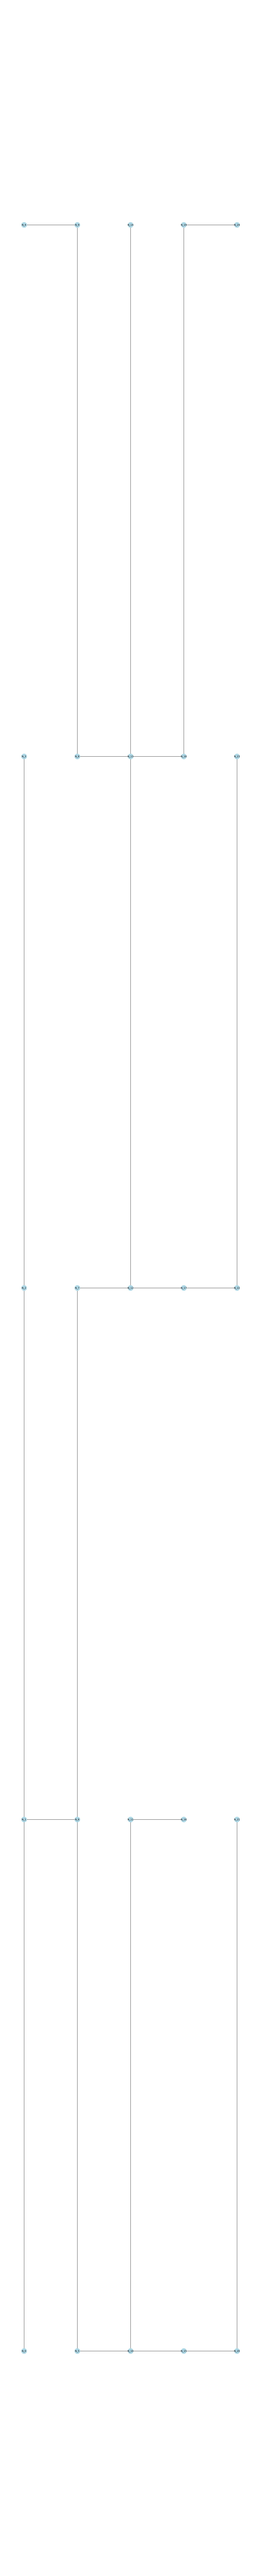

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for node in graph:
    G.add_node(graph[node].get_name(), pos=(graph[node].get_x(), graph[node].get_y()))
    for neighbor in graph[node].get_neighbors():
        G.add_edge(graph[node].get_name(), graph[neighbor[0]].get_name())
        #print(graph[neighbor[0]].get_name())

#get node positions from node attributes
node_positions = {node: data["pos"] for node, data in G.nodes(data=True)}

plt.figure(figsize=(15, 150))  #adjust the size as needed

#draw the graph with custom node positions
nx.draw(G, pos=node_positions, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black")

#show the graph
plt.show()